#**Keystroke Dynamics on Mobile Devices Varying with Time**




###Importing required libraries

In [ ]:
#import required libraries
import os
import pandas as pd
import numpy as np
import datetime
import pickle
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.dates as mdates


In [ ]:
# pickle functions
#for reading pickle file
def read_pickle(filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'rb') as file:
     unpickler = pickle.Unpickler(file)
     df = pickle.load(file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))
  return df
  
#to write into a pickle file
def write_pickle(df,filename, path='/content/drive/My Drive/Practicum/Pickle/'):
  sct = datetime.datetime.now()
  print("Start Pickle Load time: {0}".format(sct))
  with open(path + filename, 'wb') as file:
    pickle.dump(pd.DataFrame(df), file)
  ct = datetime.datetime.now()
  print("End Pickle Load time: {0}   Duration:{1}".format(ct, ct-sct))


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
# mounting a specific directory on my google drive for data storage and retrieval
os.chdir("/content/drive/My Drive/Practicum/")
!ls


Mounted at /content/drive
'Colab Notebooks'
 CSV
 Dailywise_DwellTime_FlightTime.jpeg
 db_backups
 Ethics-Notification-Form-Computing-November-2020.docx
'Language Logger -Logging Details.pptx'
'Manual for set up language logger app backend application on windows.gdoc'
 Month_DwellTime_FlightTime.jpeg
 Pickle
 plotly_gantt_chart-main
 reseachIMELogging.html
 reseachIMELogging.mp4
 ResearchIME
 Timeslot_DwellTime_FlightTime.jpeg
 WeekDays_DwellTime_FlightTime.jpeg


In [ ]:
#read specific columns from CSV file 
col_list = ["user_uuid", "timestamp","type"]
df_event = pd.read_csv("CSV/event_26_07_2021.csv", usecols=col_list)
df_event.head(10)

,type,user_uuid,timestamp
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
5,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
7,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
9,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12


In [ ]:
#rename column name 'type' to 'event_type' 
df_event.rename(columns = {'type' :'event_type'}, inplace = True)
df_event.head(10)

,event_type,user_uuid,timestamp
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
5,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
7,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12
9,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,1.612260e+12


In [ ]:
#convert epoc time to normal time
df_event['timestamp']=pd.to_datetime(df_event['timestamp'],unit='ms')
#df_event.describe
df_event
#df_event.timestamp.dtype

,event_type,user_uuid,timestamp
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00
...,...,...,...
715592,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20
715593,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20
715594,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20
715595,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20


In [ ]:
#find out invalid rows( invalid cosecuitive events are :touch_up-touch_up,touch_down-touch_down,touch_up-touch_down)
#assign id to valid events(valid consecutive events are: touch_down and touch_up)
df_event['event_id']=0
df_event['is_valid']=True
event_cnt=0;
df_len=len(df_event)
for i in range(df_len) :
  if (df_event.loc[i,'event_type']=="TOUCH_DOWN"):
    if (df_event.loc[i+1,'event_type']=="TOUCH_UP"):
     event_cnt+= 1 
     #assign event id
     df_event.loc[i,'event_id']=df_event.loc[i+1,'event_id']=event_cnt 
    else:
        df_event.loc[i,'is_valid']=False
        #drop invalid rows
        #df_event = df_event.drop(i)     
df_event

,event_type,user_uuid,timestamp,event_id,is_valid
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,3,True
...,...,...,...,...,...
715592,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349377,True
715593,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True
715594,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True
715595,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349379,True


In [ ]:
#filter df with valid events
df_event= df_event.query('is_valid==True ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,user_uuid,timestamp,event_id,is_valid
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,3,True
...,...,...,...,...,...
715592,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349377,True
715593,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True
715594,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True
715595,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349379,True


In [ ]:
#write the dataframe 'df_event' as pickle file
write_pickle(df_event,'df_event_26-07-2021.p')

Start Pickle Load time: 2021-07-31 12:24:44.709896
End Pickle Load time: 2021-07-31 12:24:46.592134   Duration:0:00:01.882238


Read Pickle

In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event_26-07-2021.p')
df_event

Start Pickle Load time: 2021-07-31 12:24:46.609754
End Pickle Load time: 2021-07-31 12:24:46.707494   Duration:0:00:00.097740


,event_type,user_uuid,timestamp,event_id,is_valid
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True
1,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True
3,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,3,True
...,...,...,...,...,...
715592,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349377,True
715593,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True
715594,TOUCH_UP,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True
715595,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349379,True


In [ ]:
#filter df with event type=TOUCH_DOWN 
#because each event start with touch down and end with touch up and so we need to count either touch_down or touch_events for finding no of events"
df_event= df_event.query('event_type=="TOUCH_DOWN" ').loc[:,:]  #loc will allocate memory for query result
df_event

,event_type,user_uuid,timestamp,event_id,is_valid
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,3,True
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,4,True
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,5,True
...,...,...,...,...,...
715587,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349375,True
715589,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349376,True
715591,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349377,True
715593,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True


In [ ]:
df_event.event_type.unique()

array(['TOUCH_DOWN'], dtype=object)

In [ ]:
#Add a new column 'event_date' by extracting date from timstamp 
df_event['event_date']=pd.to_datetime(df_event['timestamp']).dt.strftime('%Y-%m-%d')
df_event.head(10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_type,user_uuid,timestamp,event_id,is_valid,event_date
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True,2021-02-02
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True,2021-02-02
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,3,True,2021-02-02
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,4,True,2021-02-02
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,5,True,2021-02-02
10,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,6,True,2021-02-02
12,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,7,True,2021-02-02
14,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,8,True,2021-02-02
16,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,9,True,2021-02-02
19,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,10,True,2021-02-02


In [ ]:
df_event['event_month']=pd.to_datetime(df_event['timestamp']).dt.month_name()
#remove data of may month
df_event=df_event[~df_event.event_month.isin(['May'])]
df_event

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,event_type,user_uuid,timestamp,event_id,is_valid,event_date,event_month
0,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,1,True,2021-02-02,February
2,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,2,True,2021-02-02,February
4,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,3,True,2021-02-02,February
6,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,4,True,2021-02-02,February
8,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,5,True,2021-02-02,February
...,...,...,...,...,...,...,...
715587,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349375,True,2021-07-26,July
715589,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349376,True,2021-07-26,July
715591,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349377,True,2021-07-26,July
715593,TOUCH_DOWN,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-07-26 22:53:20,349378,True,2021-07-26,July


In [ ]:
#drop irrelevent columns
df_event=df_event.drop(['timestamp','event_type','is_valid','event_month'],axis=1)
df_event

,user_uuid,event_id,event_date
0,0a78bf07-81a2-4b62-9221-74c682007fbc,1,2021-02-02
2,0a78bf07-81a2-4b62-9221-74c682007fbc,2,2021-02-02
4,0a78bf07-81a2-4b62-9221-74c682007fbc,3,2021-02-02
6,0a78bf07-81a2-4b62-9221-74c682007fbc,4,2021-02-02
8,0a78bf07-81a2-4b62-9221-74c682007fbc,5,2021-02-02
...,...,...,...
715587,0a78bf07-81a2-4b62-9221-74c682007fbc,349375,2021-07-26
715589,0a78bf07-81a2-4b62-9221-74c682007fbc,349376,2021-07-26
715591,0a78bf07-81a2-4b62-9221-74c682007fbc,349377,2021-07-26
715593,0a78bf07-81a2-4b62-9221-74c682007fbc,349378,2021-07-26


In [1]:
#read user details from user table
df_user = pd.read_csv("CSV/user_26_07_2021.csv")
#convert epoc time to normal time
df_user['registration_timestamp']=pd.to_datetime(df_user['registration_timestamp'],unit='ms')
#df_event.describe
df_user=df_user.sort_values(by="registration_timestamp", ascending=True).reset_index()
df_user
#rename uuid as user_uuid
df_user.rename(columns = {'uuid' :'user_uuid',}, inplace = True)
df_user



NameError: ignored

In [ ]:
#assign username based on registration time
user_no=0;
df_user['user_name']=''
df_len=len(df_user)
for i in range(df_len) : 
     user_no+= 1 
     #assign event id
     df_user.loc[i,'user_name']="user"+str(user_no)      
df_user



,index,user_uuid,registration_timestamp,user_name
0,12,ae80cf27-4366-412a-a8ac-c8430584bfbf,2021-02-02 01:40:00,user1
1,2,0a78bf07-81a2-4b62-9221-74c682007fbc,2021-02-02 10:00:00,user2
2,14,f2433e01-2cc2-406d-b1b5-681e70f129df,2021-02-02 10:00:00,user3
3,13,e802576c-b731-4e60-b92d-700f2503b822,2021-02-02 12:46:40,user4
4,11,840552bc-bab5-40bd-9a92-9308e5f32543,2021-02-02 15:33:20,user5
5,7,3be4af41-4349-41cf-9c77-fbdb0d12ba86,2021-02-03 11:00:00,user6
6,9,46952d51-25ad-405a-ac11-a22a624ae6b5,2021-02-03 11:00:00,user7
7,4,177fa0fa-b181-4acd-9783-891e51749da9,2021-06-10 13:00:00,user8
8,3,0c758b6e-548e-4a2b-b02c-7af01931c7b1,2021-06-10 15:46:40,user9
9,8,4669d044-8174-404a-b71a-6e1054d1455a,2021-06-10 15:46:40,user10


In [ ]:
#active user names
df_user.to_csv('/content/drive/My Drive/Practicum/CSV/userlist.csv')

In [ ]:
#here we add extra coulmns as username by assigning username for each user_uuid
#create series of unique user ids
#user_ids=df_event['user_uuid'].drop_duplicates().sort_values().reset_index(drop=True)
#uname=['user1','user2','user3','user4','user5','user6','user7','user8','user9','user10','user11','user12']
#se=pd.DataFrame(uname[0:len(user_ids)])#create series with user name
#se.columns=['user_name']#set index as user_name
#create df with user_uuid and user_name
#df_user=pd.concat([user_ids,se],axis=1)

#drop irrelevent columns
df_user=df_user.drop(['index','registration_timestamp'],axis=1)
#df_user 
#join dataframes such as df_uname and df_event_new
df_event = df_event.merge(df_user,on='user_uuid',how='inner').sort_values('event_date').reset_index(drop=True)
df_event

,user_uuid,event_id,event_date,user_name
0,0a78bf07-81a2-4b62-9221-74c682007fbc,1,2021-02-02,user2
1,f2433e01-2cc2-406d-b1b5-681e70f129df,1323,2021-02-02,user3
2,f2433e01-2cc2-406d-b1b5-681e70f129df,1324,2021-02-02,user3
3,f2433e01-2cc2-406d-b1b5-681e70f129df,1325,2021-02-02,user3
4,f2433e01-2cc2-406d-b1b5-681e70f129df,1326,2021-02-02,user3
...,...,...,...,...
344990,0a78bf07-81a2-4b62-9221-74c682007fbc,348511,2021-07-26,user2
344991,0a78bf07-81a2-4b62-9221-74c682007fbc,348510,2021-07-26,user2
344992,0a78bf07-81a2-4b62-9221-74c682007fbc,348509,2021-07-26,user2
344993,0a78bf07-81a2-4b62-9221-74c682007fbc,348531,2021-07-26,user2


In [ ]:
#to find total no of key strokes and no of active days of each user
df_total_events=df_event.groupby(
    ['user_name','user_uuid']
).agg(active_days_cnt=('event_date',pd.Series.nunique),total_events=('event_id',pd.Series.count)).sort_values("user_name", ascending=True).reset_index()
df_total_events



,user_name,user_uuid,active_days_cnt,total_events
0,user1,ae80cf27-4366-412a-a8ac-c8430584bfbf,16,1817
1,user10,4669d044-8174-404a-b71a-6e1054d1455a,7,3100
2,user11,2dbf5217-c47b-4523-941f-141f6900a13b,17,21864
3,user12,2b028d53-b61b-4fce-b5f3-0eb58336ee02,34,4524
4,user13,002cdc73-0101-4e88-b6ad-ff25836d3f8b,17,630
5,user14,4f9fbdea-7cb5-4d2b-a572-9a5f82fbd14e,27,3692
6,user15,0a787ab7-ad24-4523-9345-3b572aba73b1,24,34138
7,user2,0a78bf07-81a2-4b62-9221-74c682007fbc,80,76972
8,user3,f2433e01-2cc2-406d-b1b5-681e70f129df,59,119393
9,user4,e802576c-b731-4e60-b92d-700f2503b822,2,4197


In [ ]:
#sort by no of active days
df_totalevent_soryby_dayscnt=df_total_events.sort_values("active_days_cnt", ascending=False).reset_index()
df_totalevent_soryby_dayscnt

,index,user_name,user_uuid,active_days_cnt,total_events
0,7,user2,0a78bf07-81a2-4b62-9221-74c682007fbc,80,76972
1,8,user3,f2433e01-2cc2-406d-b1b5-681e70f129df,59,119393
2,12,user7,46952d51-25ad-405a-ac11-a22a624ae6b5,53,37560
3,3,user12,2b028d53-b61b-4fce-b5f3-0eb58336ee02,34,4524
4,13,user8,177fa0fa-b181-4acd-9783-891e51749da9,32,27118
5,5,user14,4f9fbdea-7cb5-4d2b-a572-9a5f82fbd14e,27,3692
6,6,user15,0a787ab7-ad24-4523-9345-3b572aba73b1,24,34138
7,14,user9,0c758b6e-548e-4a2b-b02c-7af01931c7b1,23,2616
8,2,user11,2dbf5217-c47b-4523-941f-141f6900a13b,17,21864
9,4,user13,002cdc73-0101-4e88-b6ad-ff25836d3f8b,17,630


In [ ]:
df_totalevent_soryby_dayscnt.to_csv('/content/drive/My Drive/Practicum/CSV/df_totalevent_soryby_dayscnt.csv')

In [ ]:
#sort by total no of events
df_totalevent_soryby_eventcnt=df_total_events.sort_values("total_events", ascending=False).reset_index()
df_totalevent_soryby_eventcnt

,index,user_name,user_uuid,active_days_cnt,total_events
0,8,user3,f2433e01-2cc2-406d-b1b5-681e70f129df,59,119393
1,7,user2,0a78bf07-81a2-4b62-9221-74c682007fbc,80,76972
2,12,user7,46952d51-25ad-405a-ac11-a22a624ae6b5,53,37560
3,6,user15,0a787ab7-ad24-4523-9345-3b572aba73b1,24,34138
4,13,user8,177fa0fa-b181-4acd-9783-891e51749da9,32,27118
5,2,user11,2dbf5217-c47b-4523-941f-141f6900a13b,17,21864
6,3,user12,2b028d53-b61b-4fce-b5f3-0eb58336ee02,34,4524
7,11,user6,3be4af41-4349-41cf-9c77-fbdb0d12ba86,3,4222
8,9,user4,e802576c-b731-4e60-b92d-700f2503b822,2,4197
9,5,user14,4f9fbdea-7cb5-4d2b-a572-9a5f82fbd14e,27,3692


In [ ]:
#remove less active users
df_event=df_event[~df_event.user_uuid.isin(['3be4af41-4349-41cf-9c77-fbdb0d12ba86','e802576c-b731-4e60-b92d-700f2503b822','4669d044-8174-404a-b71a-6e1054d1455a'])]
df_event

,user_uuid,event_id,event_date,user_name
0,0a78bf07-81a2-4b62-9221-74c682007fbc,1,2021-02-02,user2
1,f2433e01-2cc2-406d-b1b5-681e70f129df,1323,2021-02-02,user3
2,f2433e01-2cc2-406d-b1b5-681e70f129df,1324,2021-02-02,user3
3,f2433e01-2cc2-406d-b1b5-681e70f129df,1325,2021-02-02,user3
4,f2433e01-2cc2-406d-b1b5-681e70f129df,1326,2021-02-02,user3
...,...,...,...,...
344990,0a78bf07-81a2-4b62-9221-74c682007fbc,348511,2021-07-26,user2
344991,0a78bf07-81a2-4b62-9221-74c682007fbc,348510,2021-07-26,user2
344992,0a78bf07-81a2-4b62-9221-74c682007fbc,348509,2021-07-26,user2
344993,0a78bf07-81a2-4b62-9221-74c682007fbc,348531,2021-07-26,user2


In [ ]:
#write the dataframe 'df_event' as pickle file
write_pickle(df_event,'df_event_active_users_26_07_2021.p')


Start Pickle Load time: 2021-07-31 12:24:51.667270
End Pickle Load time: 2021-07-31 12:24:51.835277   Duration:0:00:00.168007


Read Pickle

In [ ]:
#retrieve the pickle file 'df_event.p' 
df_event=read_pickle('df_event_active_users_26_07_2021.p')
df_event

Start Pickle Load time: 2021-07-31 12:24:51.849367
End Pickle Load time: 2021-07-31 12:24:51.964669   Duration:0:00:00.115302


,user_uuid,event_id,event_date,user_name
0,0a78bf07-81a2-4b62-9221-74c682007fbc,1,2021-02-02,user2
1,f2433e01-2cc2-406d-b1b5-681e70f129df,1323,2021-02-02,user3
2,f2433e01-2cc2-406d-b1b5-681e70f129df,1324,2021-02-02,user3
3,f2433e01-2cc2-406d-b1b5-681e70f129df,1325,2021-02-02,user3
4,f2433e01-2cc2-406d-b1b5-681e70f129df,1326,2021-02-02,user3
...,...,...,...,...
344990,0a78bf07-81a2-4b62-9221-74c682007fbc,348511,2021-07-26,user2
344991,0a78bf07-81a2-4b62-9221-74c682007fbc,348510,2021-07-26,user2
344992,0a78bf07-81a2-4b62-9221-74c682007fbc,348509,2021-07-26,user2
344993,0a78bf07-81a2-4b62-9221-74c682007fbc,348531,2021-07-26,user2


**grouping**

In [ ]:
#group by username andevent_date and find count of events in each day.
df_event_new=df_event.groupby(
    ['event_date','user_name']
).agg({'event_date':['count']})
#to  drop the outermost level from the hierarchical column index:  
df_event_new.columns = df_event_new.columns.droplevel(0)
df_event_new

count
event_date user_name       
2021-02-02 user1         11
           user2       1571
           user3       2047
2021-02-03 user1        161
           user2       1770
...                     ...
2021-07-26 user12       151
           user14        55
           user15       396
           user2        920
           user8        425

[394 rows x 1 columns]

In [ ]:
df_event_new.rename(columns = {'count' :'total_events',}, inplace = True)
df_event_new

total_events
event_date user_name              
2021-02-02 user1                11
           user2              1571
           user3              2047
2021-02-03 user1               161
           user2              1770
...                            ...
2021-07-26 user12              151
           user14               55
           user15              396
           user2               920
           user8               425

[394 rows x 1 columns]

In [ ]:
df_event_new.reset_index(inplace=True)
df_event_new

,event_date,user_name,total_events
0,2021-02-02,user1,11
1,2021-02-02,user2,1571
2,2021-02-02,user3,2047
3,2021-02-03,user1,161
4,2021-02-03,user2,1770
...,...,...,...
389,2021-07-26,user12,151
390,2021-07-26,user14,55
391,2021-07-26,user15,396
392,2021-07-26,user2,920


In [ ]:
df_event_new.event_date.dtype

dtype('O')

In [ ]:
#convert to date time
df_event_new['event_date'] = pd.to_datetime(df_event_new['event_date'])

In [ ]:
#add extra column for week day
df_event_new['weekday']=df_event_new['event_date'].dt.dayofweek
df_event_new

,event_date,user_name,total_events,weekday
0,2021-02-02,user1,11,1
1,2021-02-02,user2,1571,1
2,2021-02-02,user3,2047,1
3,2021-02-03,user1,161,2
4,2021-02-03,user2,1770,2
...,...,...,...,...
389,2021-07-26,user12,151,0
390,2021-07-26,user14,55,0
391,2021-07-26,user15,396,0
392,2021-07-26,user2,920,0


In [ ]:
#add extra coulmn as is_weekend (week days=0 to4,week end=5,6),df_event_new['weekday']>4] :
df_event_new['is_weekend']=df_event_new['weekday']>4
df_event_new

,event_date,user_name,total_events,weekday,is_weekend
0,2021-02-02,user1,11,1,False
1,2021-02-02,user2,1571,1,False
2,2021-02-02,user3,2047,1,False
3,2021-02-03,user1,161,2,False
4,2021-02-03,user2,1770,2,False
...,...,...,...,...,...
389,2021-07-26,user12,151,0,False
390,2021-07-26,user14,55,0,False
391,2021-07-26,user15,396,0,False
392,2021-07-26,user2,920,0,False


In [ ]:

df_event_new.to_csv('/content/drive/My Drive/Practicum/CSV/active_user_28_06_2021.csv')

Write newly created df to pickle file

In [ ]:
#write the new dataframe in pickle
write_pickle(df_event_new,'df_new_event_active_users_26_07_2021.p')

Start Pickle Load time: 2021-07-31 12:24:52.955230
End Pickle Load time: 2021-07-31 12:24:52.973568   Duration:0:00:00.018338


In [ ]:
#retrieve the pickle file 'df_event_new.p' 
df_active_user=read_pickle('df_new_event_active_users_26_07_2021.p')
df_active_user

Start Pickle Load time: 2021-07-31 12:24:52.989425
End Pickle Load time: 2021-07-31 12:24:52.997091   Duration:0:00:00.007666


,event_date,user_name,total_events,weekday,is_weekend
0,2021-02-02,user1,11,1,False
1,2021-02-02,user2,1571,1,False
2,2021-02-02,user3,2047,1,False
3,2021-02-03,user1,161,2,False
4,2021-02-03,user2,1770,2,False
...,...,...,...,...,...
389,2021-07-26,user12,151,0,False
390,2021-07-26,user14,55,0,False
391,2021-07-26,user15,396,0,False
392,2021-07-26,user2,920,0,False


In [ ]:
df_active_user.is_weekend.unique()

array([False,  True])

**Visualisation**

Daily Data- Feb & March

In [ ]:
#make a df for the month of feb 2021
df_event_feb_mar=df_event_new.query('event_date>="2021-02-01" & event_date<="2021-03-10" ')
df_event_feb_mar



,event_date,user_name,total_events,weekday,is_weekend
0,2021-02-02,user1,11,1,False
1,2021-02-02,user2,1571,1,False
2,2021-02-02,user3,2047,1,False
3,2021-02-03,user1,161,2,False
4,2021-02-03,user2,1770,2,False
...,...,...,...,...,...
110,2021-03-07,user2,42,6,True
111,2021-03-08,user1,547,0,False
112,2021-03-08,user2,303,0,False
113,2021-03-08,user5,123,0,False


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


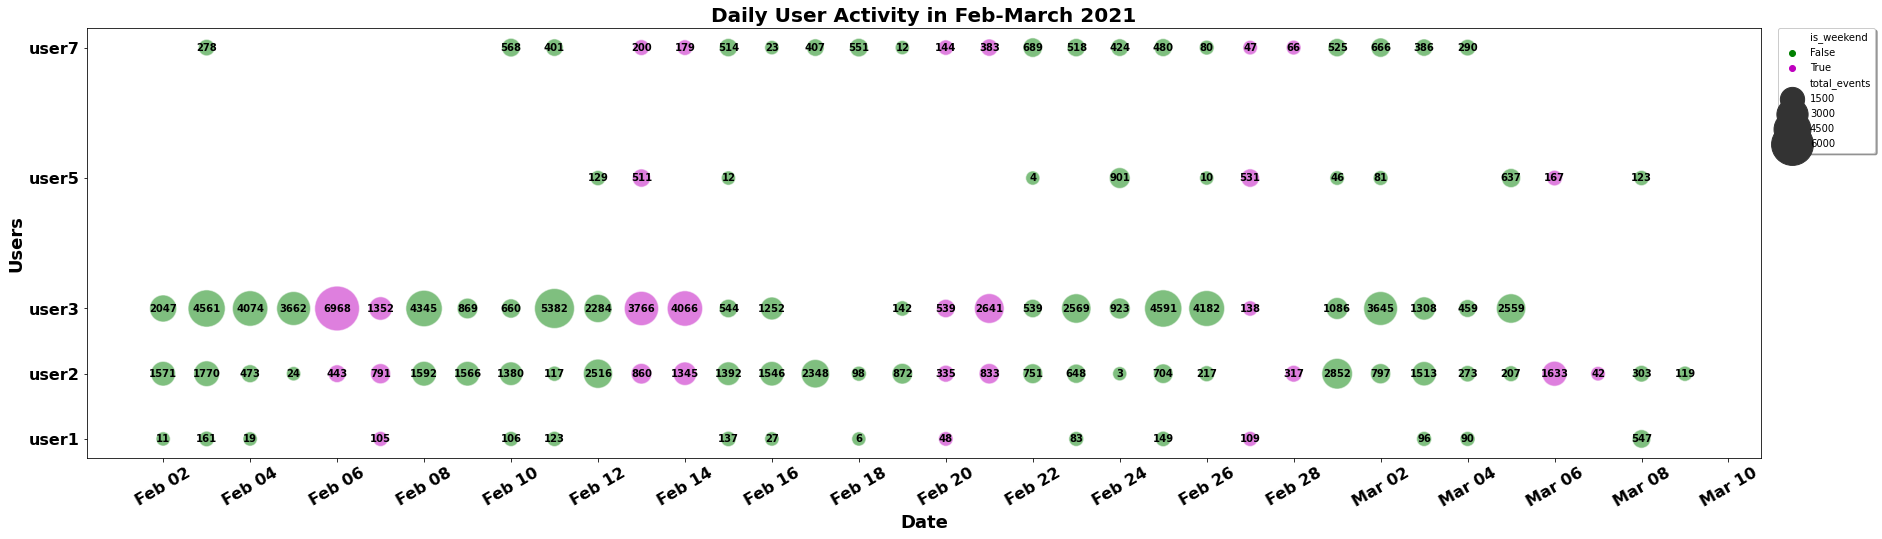

In [ ]:
#feb- march
#to plot y axis in user name asc orser
df_plot=df_event_feb_mar
df_plot['user_name']=df_plot['user_name'].str.extract('([0-9]+)').astype(int)
df_plot.user_name.unique()
# Set the figure size
plt.figure(figsize=(30, 16))
# use the scatterplot function to build the bubble map
#ax1 = sns.scatterplot(data=df_event_feb_mar, x="event_date",size="total_events",legend=False, y="user_name", hue="user_name",style="is_weekend",markers={True:"s",False:"o"},sizes=(200,2000),alpha=0.5)
ax1 = sns.scatterplot(data=df_plot, x="event_date",size="total_events", legend=True, y="user_name",hue="is_weekend",palette=('g','m'),sizes=(200,2000),alpha=0.5)

plt.title('Daily User Activity in Feb-March 2021', size = 20,fontweight='bold')
plt.xlabel('Date', size = 18,fontweight='bold')
plt.ylabel('Users', size = 18,fontweight='bold') 
plt.xticks(size=16,fontweight='bold')
plt.yticks(size=16,fontweight='bold')
#print(plt.yticks())
plt.yticks([ 1,2,3,5,7], ['user1', 'user2', 'user3','user5','user7'],size=16,fontweight='bold')
# Format the date into months & days
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#to set the interval as 3 days
locator = mdates.DayLocator(interval=2)
ax1.xaxis.set_major_locator(locator)
# Puts x-axis labels on an angle
ax1.xaxis.set_tick_params(rotation = 30)  
ax1.set_aspect(1.5)
#place legend outside top right corner of plot
#plt.legend(title='Is week end',  title_fontsize = '24', labels=('Yes','No'), fontsize ='16',bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, shadow = True, facecolor = 'white')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, shadow = True, facecolor = 'white')
#For each point, we add a text inside the bubble
#for line in range(0,df_event_feb_mar.shape[0]):
         #ax1.text(df_event_feb_mar.event_date[line], df_event_feb_mar.user_name[line], df_event_feb_mar.total_events[line],verticalalignment='center',horizontalalignment='center', size='medium', color='black', weight='semibold')

for line in range(0,df_event_feb_mar.shape[0]):
  ax1.text(df_plot.event_date[line], df_plot.user_name[line], df_plot.total_events[line],verticalalignment='center',horizontalalignment='center', size='medium', color='black', weight='semibold')


# show the graph
plt.show()



Daily Data- June & July

In [ ]:
#june-july
df_event_june_july=df_event_new.query('event_date>="2021-06-01" & event_date<="2021-07-26" ')
df_event_june_july.reset_index(inplace=True)
df_event_june_july


,index,event_date,user_name,total_events,weekday,is_weekend
0,115,2021-06-09,user2,1835,2,False
1,116,2021-06-09,user3,2,2,False
2,117,2021-06-10,user11,885,3,False
3,118,2021-06-10,user2,1741,3,False
4,119,2021-06-10,user3,762,3,False
...,...,...,...,...,...,...
274,389,2021-07-26,user12,151,0,False
275,390,2021-07-26,user14,55,0,False
276,391,2021-07-26,user15,396,0,False
277,392,2021-07-26,user2,920,0,False


In [ ]:
df_event_june_july.user_name.unique()

array(['user2', 'user3', 'user11', 'user8', 'user9', 'user12', 'user13',
       'user7', 'user14', 'user15'], dtype=object)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


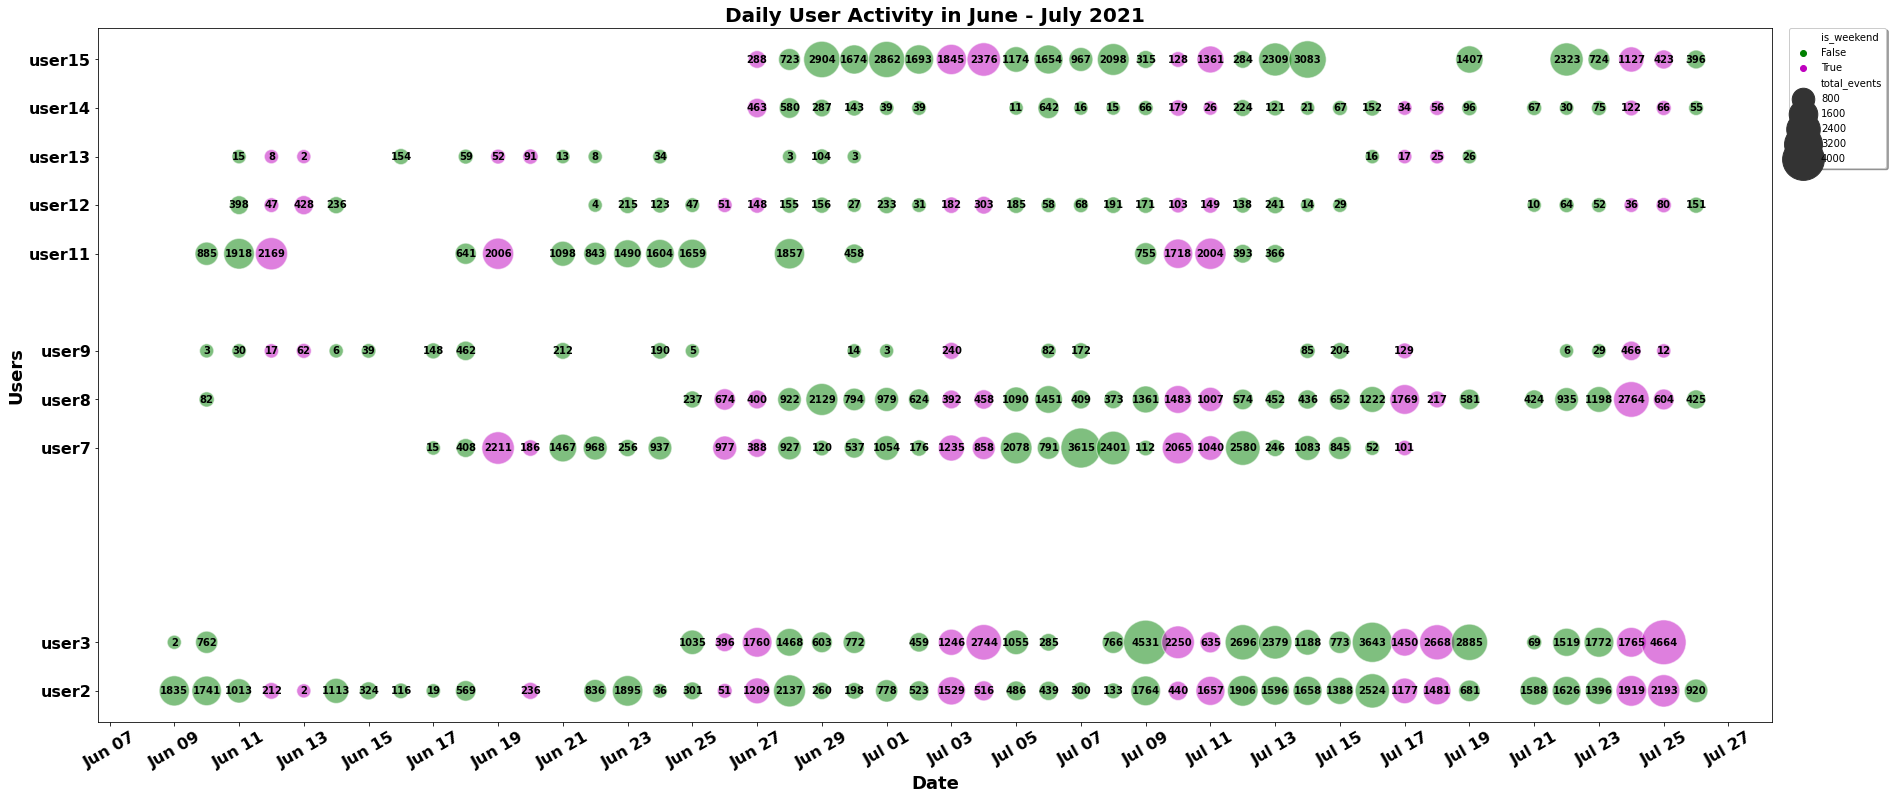

In [ ]:
#june-july
df_plot=df_event_june_july
df_plot['user_name']=df_plot['user_name'].str.extract('([0-9]+)').astype(int)
df_plot.user_name.unique()
# Set the figure size
plt.figure(figsize=(30, 16))
# use the scatterplot function to build the bubble map
#ax2 = sns.scatterplot(data=df_event_june_july, x="event_date",size="total_events",legend=False, y="user_name", hue="user_name",style="is_weekend",markers={True:"s",False:"o"},sizes=(200,2000),alpha=0.5)
ax2 = sns.scatterplot(data=df_plot, x="event_date",size="total_events", legend=True, y="user_name",hue="is_weekend",palette=('g','m'),sizes=(200,2000),alpha=0.5)

plt.title('Daily User Activity in June - July 2021', size = 20,fontweight='bold');
plt.xlabel('Date', size = 18,fontweight='bold')
plt.ylabel('Users', size = 18,fontweight='bold') 
plt.xticks(size=16,fontweight='bold')
plt.yticks(size=16,fontweight='bold')
plt.yticks([ 2,3,7,8,9,11,12,13,14,15], ['user2', 'user3', 'user7','user8','user9','user11','user12','user13','user14','user15'],size=16)
# Format the date into months & days
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#to set the interval as 3 days
locator = mdates.DayLocator(interval=2)
ax2.xaxis.set_major_locator(locator)
# Puts x-axis labels on an angle
ax2.xaxis.set_tick_params(rotation = 30)  
ax2.set_aspect(1.5)
#place legend outside top right corner of plot
#plt.legend(title='Is week end',  title_fontsize = '24', labels=('Yes','No'), fontsize ='16',bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0, shadow = True, facecolor = 'white')
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0, shadow = True, facecolor = 'white')
#For each point, we add a text inside the bubble
for line in range(0,df_event_june_july.shape[0]):
 ax2.text(df_plot.event_date[line], df_plot.user_name[line], df_plot.total_events[line],verticalalignment='center',horizontalalignment='center', size='medium', color='black', weight='semibold')
# show the graph
plt.show()



Average Monthly Data

In [ ]:
#Aggregate different functions over the columns and rename the index of the resulting DataFrame.

df_event_month=df_active_user.groupby([df_active_user.event_date.dt.strftime('%m -%Y'),'user_name']).agg(monthly_avg_events=('total_events',np.mean)).reset_index()
df_event_month['month']=pd.to_datetime(df_event_month['event_date']).dt.strftime('%b %Y')
#find rounded value
df_event_month['monthly_avg_events']=np.round(df_event_month['monthly_avg_events'])
#convert to int
df_event_month['monthly_avg_events']=df_event_month['monthly_avg_events'].astype(int)
#drop event_date
df_event_month=df_event_month.drop(['event_date'],axis=1)
df_event_month


,user_name,monthly_avg_events,month
0,user1,83,Feb 2021
1,user2,943,Feb 2021
2,user3,2587,Feb 2021
3,user5,300,Feb 2021
4,user7,314,Feb 2021
5,user1,244,Mar 2021
6,user2,860,Mar 2021
7,user3,1811,Mar 2021
8,user5,211,Mar 2021
9,user7,467,Mar 2021


In [ ]:
len(df_event_month.user_name.unique())

12

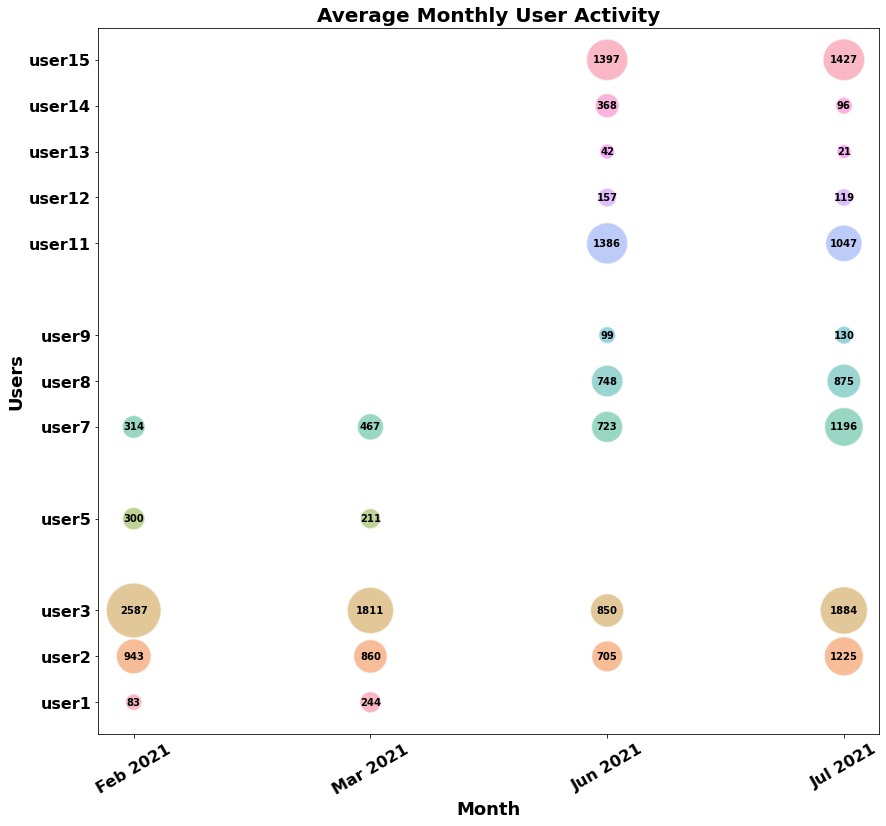

In [ ]:
# Set the figure size
plt.figure(figsize=(14, 13))
#to plot y axis in user name asc order
df_plot=df_event_month
df_plot['user_name']=df_plot['user_name'].str.extract('([0-9]+)').astype(int)
# use the scatterplot function to build the bubble map
ax3 = sns.scatterplot(data=df_plot, x="month",size="monthly_avg_events", legend=False, y="user_name",hue="user_name",palette="husl",sizes=(200,3000),alpha=0.5)

plt.title('Average Monthly User Activity', size = 20,fontweight='bold')
plt.xlabel('Month', size = 18, fontweight='bold')
plt.ylabel('Users', size = 18, fontweight='bold')
plt.xticks(size=16,fontweight='bold')
#print(plt.yticks())
plt.yticks([1,2,3,5,7,8,9,11,12,13,14,15], ['user1', 'user2', 'user3','user5','user7','user8','user9','user11','user12','user13','user14','user15'],size=16,fontweight='bold')
# Puts x-axis labels on an angle
ax3.xaxis.set_tick_params(rotation = 30) 
#For each point, we add a text inside the bubble
for line in range(0,df_event_month.shape[0]):
 ax3.text(df_plot.month[line], df_plot.user_name[line], df_plot.monthly_avg_events[line],verticalalignment='center',horizontalalignment='center', size='medium', color='black', weight='semibold')
# show the graph
plt.show()

In [ ]:
sns.color_palette("husl", 12)

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.903599057664843, 0.511987276335809, 0.19588350060161624),
 (0.7350228985632719, 0.5952719904750953, 0.1944419133847522),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.3126890019504329, 0.6928754610296064, 0.1923704830330379),
 (0.20312757197899856, 0.6881249249803418, 0.5177618167447304),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21786710662428366, 0.6656671601322255, 0.7482809385065813),
 (0.23299120924703914, 0.639586552066035, 0.9260706093977744),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.9082572436765556, 0.40195790729656516, 0.9576909250290225),
 (0.9633321742064956, 0.40643825645731757, 0.7592537599568671)]